In [2]:
from iads.data_traitement import traitement
from iads.nlp import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


# I. Chargement des données :

In [3]:
df_jeux = pd.read_csv("../data/details_desc.csv")
df_jeux.head()

,Nombre d'avis rectifiés,Note rectifiée,Note Finkel,Nombre d'avis,titre,Note,categories,description,full_title,_id,...,editors,distributors,nb_players,age_required,duration,enfant,ado,adulte,solo,multi
0,10.0,8.40,8.74,19.0,Marvel United,7.58,NaN,marvel united unir contre super vilain red sku...,Marvel United (2020),marvel-united,...,CMON Limited,NaN,1-4,14-99,45.0,0,1,1,1,1
1,17.0,7.29,7.68,33.0,Mariposas,7.39,NaN,annee printemps million papillon monarque quit...,Mariposas (2020),mariposas,...,Gigamic,NaN,2-5,14-99,60.0,0,1,1,0,1
2,9.0,7.22,7.42,28.0,Quetzal,8.18,placement,tete groupe aventurier archeologue expedition ...,Quetzal (2020),quetzal,...,Gigamic,NaN,2-5,8-99,45.0,0,1,1,0,1
3,0.0,0.00,0.00,4.0,Alien - Kit de Démarrage,9.00,NaN,kit demarrage complet plongez horreur boite co...,Alien - Kit de Démarrage (2020),alien-kit-de-demarrage,...,Arkhane Asylum Publishing,NaN,1-99,12-99,NaN,0,1,1,1,1
4,24.0,8.79,9.70,72.0,The LOOP,8.75,gestion,dr foo cree terrrribl machine voyager temps ai...,The LOOP (2020),the-loop,...,Catch Up Games,NaN,1-4,12-99,60.0,0,1,1,1,1


In [4]:
df_avis = pd.read_csv("../data/avis_clean.csv")
df_avis.head()

,title,note,author,comment,date_published,treated,title_review,title_id_jeu
0,Mariposas,8.0,Monsieur Guillaume,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021,True,Voyages sur les ailes des papillons,mariposas
1,Mariposas,7.0,morlockbob,Comment continuer après un mega hit ? Simpleme...,2020,True,le festival de Michoacan,mariposas
2,Mariposas,7.0,SwatSh,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...",2021,True,Vivez la migration des monarques,mariposas
3,Mariposas,8.0,Timi JeuxATheme,NaN,2020,True,Bon,mariposas
4,Mariposas,9.0,prunelles,"Très joli bijou que ce jeu-là ! Le matériel, l...",2021,True,Envolez-moi,mariposas


In [5]:
len(np.unique(df_avis["title_id_jeu"]))

10936

In [6]:
len(np.unique(df_jeux["_id"]))

16873

In [7]:
np.unique(df_avis[df_avis["author"]== "Monsieur Guillaume"]["title_id_jeu"] == "marvel-united")

array([False])

In [7]:
# Définir les index pour les DataFrames
df_avis_indexed = df_avis.set_index(['author', 'title_id_jeu'])
df_jeux_indexed = df_jeux.set_index('_id')

# Créer une matrice de notes vide, où chaque ligne représente un utilisateur
# et chaque colonne représente un jeu
users = df_avis['author'].unique()
games = df_jeux['_id'].unique()
ratings_matrix = np.zeros((len(users), len(games)))

# Remplir la matrice avec les notes données par les utilisateurs
with tqdm(total=len(users)*len(games)) as pbar:
    for i, user in enumerate(users):
        for j, game in enumerate(games):
            try: 
                game_rating = df_avis_indexed.loc[(user, game), 'note']
                if not game_rating.empty:
                    ratings_matrix[i, j] = game_rating.values[0]
                pbar.update(1)
            except:
                pbar.update(1)
                continue

print(ratings_matrix)

  0%|          | 1006998/229860879 [01:10<4:45:13, 13372.34it/s]

In [8]:
# Définir les index pour les DataFrames
df_avis_indexed = df_avis.set_index(['author', 'title_id_jeu'])
df_jeux_indexed = df_jeux.set_index('_id')

# Créer une matrice de notes vide, où chaque ligne représente un utilisateur
# et chaque colonne représente un jeu
users = df_avis['author'].unique()
games = df_jeux['_id'].unique()
ratings_matrix = np.zeros((len(users), len(games)))

# Remplir la matrice avec les notes données par les utilisateurs
ratings_matrix = df_avis_indexed['note'].unstack(level=-1).reindex(users, fill_value=0).values

# Afficher la matrice de notes
print(ratings_matrix)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


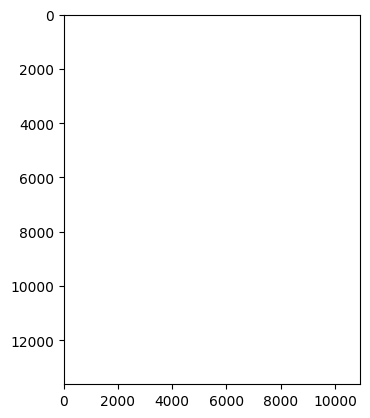

In [9]:
plt.imshow(ratings_matrix)